<a href="https://colab.research.google.com/github/rubyclaguna/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/DS_Unit_1_Sprint_Challenge_3_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from scipy import stats 

In [5]:
# Import dataset and determine the shape.
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
credit_data = pd.read_csv(url)
print (credit_data.shape)
credit_data.head()

(689, 16)


,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [10]:
# Change the column names as described above.
col_names = ['A1','A2','A3','A4','A5','A6','A7','A8', 'A9',
             'A10','A11','A12','A13','A14','A15','A16']
df = pd.read_csv(url, header = None, names = col_names)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [23]:
# Check for any missing values.
# No missing values determined but this can't be correct since the description noted there were missing values. 
df.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [24]:
# Check for unique values. 
df.A1.unique()

array(['b', 'a', nan], dtype=object)

In [25]:
# Convert '?' into NaN values. 
df.replace('?', np.NaN, inplace = True)
df.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [26]:
df.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9        bool
A10       bool
A11      int64
A12       bool
A13     object
A14     object
A15      int64
A16     object
dtype: object

In [28]:
df.shape

(690, 16)

In [30]:
#Drop missing values, still have significant amt of data. 
df2 = df.dropna()
df2.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [31]:
df2.shape

(653, 16)

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [47]:
from scipy.stats import chisquare
from scipy import stats
df2.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,True,True,1,False,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,True,True,6,False,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,True,False,0,False,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,True,True,5,True,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,True,False,0,False,s,00120,0,+


***Continuous Variables***

In [48]:
df2.describe()

,A3,A8,A11,A15
count,653.000000,653.000000,653.000000,653.000000
mean,4.829533,2.244296,2.502297,1013.761103
std,5.027077,3.371120,4.968497,5253.278504
min,0.000000,0.000000,0.000000,0.000000
25%,1.040000,0.165000,0.000000,0.000000
50%,2.835000,1.000000,0.000000,5.000000
75%,7.500000,2.625000,3.000000,400.000000
max,28.000000,28.500000,67.000000,100000.000000


In [49]:
data_pivot = pd.pivot_table(df2,index=['A16'])
print(data_pivot)

          A10       A11       A12          A15        A3        A8        A9
A16                                                                         
+    0.685811  4.716216  0.489865  2009.726351  5.971943  3.475186  0.939189
-    0.235294  0.666667  0.439776   187.974790  3.882325  1.223725  0.198880


In [0]:
# Split the 2 dataframes, approved and denied.
approved_df = df2.loc[df2['A16'] == '+']
denied_df = df2.loc[df2['A16'] == '-']

In [51]:
approved_df.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,True,True,1,False,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,True,True,6,False,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,True,False,0,False,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,True,True,5,True,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,True,False,0,False,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,True,False,0,True,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,True,False,0,True,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,True,False,0,False,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,True,False,0,False,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,True,False,0,True,g,00052,1442,+


In [52]:
denied_df.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
70,b,32.33,7.500,u,g,e,bb,1.585,True,False,0,True,s,00420,0,-
72,a,38.58,5.000,u,g,cc,v,13.500,True,False,0,True,g,00980,0,-
73,b,44.25,0.500,u,g,m,v,10.750,True,False,0,False,s,00400,0,-
74,b,44.83,7.000,y,p,c,v,1.625,False,False,0,False,g,00160,2,-
75,b,20.67,5.290,u,g,q,v,0.375,True,True,1,False,g,00160,0,-
76,b,34.08,6.500,u,g,aa,v,0.125,True,False,0,True,g,00443,0,-
77,a,19.17,0.585,y,p,aa,v,0.585,True,False,0,True,g,00160,0,-
78,b,21.67,1.165,y,p,k,v,2.500,True,True,1,False,g,00180,20,-
79,b,21.50,9.750,u,g,c,v,0.250,True,False,0,False,g,00140,0,-
80,b,49.58,19.000,u,g,ff,ff,0.000,True,True,1,False,g,00094,0,-


In [0]:
approved_df = approved_df.replace('-', 0)
approved_df = approved_df.replace('+', 1)

approved_df['A16'] = pd.to_numeric(approved_df['A16'])


In [0]:
denied_df = denied_df.replace('-', 0)
denied_df = denied_df.replace('+', 1)

In [0]:
approved_df = df2.loc[df2['A16'] == 1]
denied_df = df2.loc[df2['A16'] == 0]

In [91]:
# Start running t tests on the columns.
# Determine Null Hypothesis
scipy.stats.ttest_1samp(df2['A16'], 0.5)

Ttest_1sampResult(statistic=-2.3957620082073516, pvalue=0.016866793153617363)

In [102]:
scipy.stats.ttest_1samp(approved_df['A3'], 0.5)

Ttest_1sampResult(statistic=17.13978661056612, pvalue=3.529270818616343e-46)

In [103]:
scipy.stats.ttest_1samp(denied_df['A3'], 0.5)

Ttest_1sampResult(statistic=14.54723412867926, pvalue=5.938783936105204e-38)

In [104]:
scipy.stats.ttest_1samp(approved_df['A8'], 0.5)

Ttest_1sampResult(statistic=12.282728352699618, pvalue=2.7564034680860017e-28)

In [105]:
scipy.stats.ttest_1samp(denied_df['A8'], 0.5)

Ttest_1sampResult(statistic=6.738568319848268, pvalue=6.453912635614688e-11)

In [106]:
scipy.stats.ttest_1samp(approved_df['A11'], 0.5)

Ttest_1sampResult(statistic=11.337446996114545, pvalue=5.68150788132625e-25)

In [107]:
scipy.stats.ttest_1samp(denied_df['A11'], 0.5)

Ttest_1sampResult(statistic=1.608009129132978, pvalue=0.10871964179469769)

In [0]:
#Null Hypothesis rejected for denied in A11 

***Categorical Variables***

In [111]:
# Explore crosstabs 

p1 = pd.crosstab(df2['A15'], df2['A5'])
p1

A5,g,gg,p
A15,,,
0,208,1,66
1,15,0,12
2,4,0,5
3,5,0,1
4,2,0,3
5,8,0,0
6,6,0,2
7,3,0,1
8,2,0,0


In [112]:
p2 = pd.crosstab(df2['A16'], df2['A15']) 
p2

A15,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,27,28,32,33,35,38,40,41,42,44,50,53,55,58,59,...,2954,3000,3065,3257,3290,3376,3552,4000,4071,4159,4208,4500,4607,4700,5000,5124,5298,5552,5777,5800,5860,6590,6700,7059,7544,8000,8851,9800,10000,10561,11177,11202,13212,15000,15108,18027,31285,50000,51100,100000
A16,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,167,25,9,5,5,8,5,2,1,1,4,1,1,2,0,0,2,1,2,1,3,2,1,0,1,2,1,1,1,1,1,1,1,1,1,4,1,1,0,0,...,0,0,0,0,0,0,1,2,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,108,2,0,1,0,0,3,2,1,0,0,1,0,0,1,2,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,1,...,1,4,2,1,1,1,0,1,1,1,0,0,1,1,3,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [113]:
p3 = pd.crosstab(df2['A8'], df2['A9'])
p3

A9,False,True
A8,,
0.000,41,19
0.040,22,10
0.085,18,6
0.125,21,8
0.165,19,1
0.210,3,3
0.250,21,11
0.290,9,3
0.335,4,1


In [114]:
# Run chi tests 
t1 = pd.crosstab(df2.A5, df2.A16, margins=True)

stats.chi2_contingency(t1)[0:3]

(21.783250793172815, 0.0013253786890314136, 6)

In [116]:
print (t1)

A16    0    1  All
A5                
g    250  249  499
gg     0    2    2
p    107   45  152
All  357  296  653


In [117]:
t2 = pd.crosstab(df2.A8, df2.A9, margins = True)
stats.chi2_contingency(t2)[0:3]

(199.69515638924588, 0.9983788619479469, 262)

In [118]:
print (t2)

A9      False  True  All
A8                      
0.0        41    19   60
0.04       22    10   32
0.085      18     6   24
0.125      21     8   29
0.165      19     1   20
0.21        3     3    6
0.25       21    11   32
0.29        9     3   12
0.335       4     1    5
0.375       3     4    7
0.415       6     2    8
0.455       0     1    1
0.46        0     1    1
0.5        15    12   27
0.54        4     1    5
0.585       3     3    6
0.625       0     2    2
0.665       4     2    6
0.71        0     1    1
0.75        5     7   12
0.79        1     0    1
0.795       0     1    1
0.835       0     4    4
0.875       1     3    4
0.96        1     1    2
1.0        17    13   30
1.04        0     1    1
1.085       2     4    6
1.165       3     1    4
1.21        0     2    2
...       ...   ...  ...
7.5         0     3    3
7.585       0     1    1
7.875       0     1    1
7.96        0     1    1
8.0         0     2    2
8.29        1     0    1
8.5         0     4    4


In [119]:
t3 = pd.crosstab(df2.A15, df2.A5, margins = True)
stats.chi2_contingency(t3)[0:3]

(546.8702083033692, 0.999974915563083, 687)

In [121]:
print (t3)

A5        g  gg    p  All
A15                      
0       208   1   66  275
1        15   0   12   27
2         4   0    5    9
3         5   0    1    6
4         2   0    3    5
5         8   0    0    8
6         6   0    2    8
7         3   0    1    4
8         2   0    0    2
9         1   0    0    1
10        4   0    0    4
11        2   0    0    2
12        1   0    0    1
13        1   0    1    2
14        1   0    0    1
15        1   0    1    2
16        1   0    1    2
17        0   0    1    1
18        2   0    0    2
19        2   0    0    2
20        1   0    3    4
21        2   0    0    2
22        1   0    0    1
23        1   0    0    1
25        1   0    0    1
27        2   0    0    2
28        1   0    1    2
32        0   0    1    1
33        1   0    0    1
35        2   0    0    2
...     ...  ..  ...  ...
4500      1   0    0    1
4607      1   0    0    1
4700      1   0    0    1
5000      3   0    0    3
5124      1   0    0    1
5298      1 

In [123]:
for sample in [df.A8, df.A9]:
    print(f"Mean: {sample.mean()}")
    print(f"Standard Deviation: {sample.std()}")
    print(f"Variance: {sample.var()}")
    print("---"*10)

Mean: 2.2234057971014476
Standard Deviation: 3.3465133592781333
Variance: 11.199151663827017
------------------------------
Mean: 0.5231884057971015
Standard Deviation: 0.49982433127002757
Variance: 0.24982436212953024
------------------------------


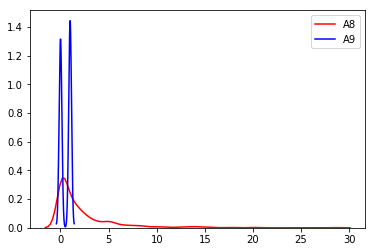

In [128]:
sns.kdeplot(df.A8, color='r');
sns.kdeplot(df.A9, color='b');

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

1. The continuous variable I ran the ttest showed that most had a small impact on whether the applicant was to be approved or denied. Some features had an impact but most did not. i used crosstabs in order to compare the categorical values.
2.  I noticed that my first chi test showed the most difference within the data. 
3. The most challengin part for me was figuring out what data I wanted to use for my ttests and chitests and figure out the relationship between them. 